# Analysis of scenarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
scenario_list = pd.read_csv('scenario_list_test_1.csv', index_col='Scenario')
scenario_results = pd.read_csv('scenario_results_test_1.csv', low_memory=False, index_col=0)

# Merge on index
data = pd.merge(scenario_list, scenario_results, left_index=True, right_index=True)
data.to_csv('full_scenarios_and_results.csv', index_label=True)

data.head()

,process_time_call_ambulance,process_time_ambulance_response,process_ambulance_on_scene_duration,process_msu_dispatch,process_msu_thrombolysis,process_msu_on_scene_post_thrombolysis,process_time_arrival_to_needle,transfer_time_delay,process_time_arrival_to_puncture,process_time_transfer_arrival_to_puncture,...,lvo_msu_ivt_utility,lvo_msu_ivt_utility_shift,lvo_msu_mt_mrs_0-2,lvo_msu_mt_mrs_shift,lvo_msu_mt_utility,lvo_msu_mt_utility_shift,lvo_msu_ivt_mt_mrs_0-2,lvo_msu_ivt_mt_mrs_shift,lvo_msu_ivt_mt_utility,lvo_msu_ivt_mt_utility_shift
Scenario,,,,,,,,,,,,,,,,,,,,,
0,0,15,20,0,15,10,30,30,30,30,...,0.40774,0.07513,0.46709,-0.97599,0.52293,0.19032,0.46709,-0.97599,0.52293,0.19032
1,0,15,20,0,15,10,30,30,30,30,...,0.40774,0.07513,0.45729,-0.92621,0.51390,0.18129,0.45729,-0.92621,0.51390,0.18129
2,0,15,20,0,15,10,30,30,30,30,...,0.40774,0.07513,0.44753,-0.87681,0.50489,0.17228,0.44753,-0.87681,0.50489,0.17228
3,0,15,20,0,15,10,30,30,30,45,...,0.40774,0.07513,0.46709,-0.97599,0.52293,0.19032,0.46709,-0.97599,0.52293,0.19032
4,0,15,20,0,15,10,30,30,30,45,...,0.40774,0.07513,0.45729,-0.92621,0.51390,0.18129,0.45729,-0.92621,0.51390,0.18129


In [3]:
# Add net benefit column
prop_nlvo = 0.7
prop_lvo = 1 - prop_nlvo

data['drip_ship_utility_shift'] = (
    (data['nlvo_drip_ship_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_drip_ship_ivt_mt_utility_shift'] * prop_lvo))

data['mothership_utility_shift'] = (
    (data['nlvo_mothership_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_utility_shift'] * prop_lvo))

data['msu_utility_shift'] = (
    (data['nlvo_msu_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_utility_shift'] * prop_lvo))

data['msu_net_benefit'] = data['msu_utility_shift'] - data['drip_ship_utility_shift']

In [4]:
list(data)

['process_time_call_ambulance',
 'process_time_ambulance_response',
 'process_ambulance_on_scene_duration',
 'process_msu_dispatch',
 'process_msu_thrombolysis',
 'process_msu_on_scene_post_thrombolysis',
 'process_time_arrival_to_needle',
 'transfer_time_delay',
 'process_time_arrival_to_puncture',
 'process_time_transfer_arrival_to_puncture',
 'process_time_msu_arrival_to_puncture',
 'nearest_ivt_time',
 'nearest_mt_time',
 'transfer_time',
 'nearest_msu_time',
 'Admissions',
 'England',
 'drip_ship_ivt_time',
 'drip_ship_mt_time',
 'nlvo_no_treatment_mrs_0-2',
 'nlvo_no_treatment_utility',
 'lvo_no_treatment_mrs_0-2',
 'lvo_no_treatment_utility',
 'nlvo_drip_ship_ivt_mrs_0-2',
 'nlvo_drip_ship_ivt_mrs_shift',
 'nlvo_drip_ship_ivt_utility',
 'nlvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_ivt_mrs_0-2',
 'lvo_drip_ship_ivt_mrs_shift',
 'lvo_drip_ship_ivt_utility',
 'lvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_mt_mrs_0-2',
 'lvo_drip_ship_mt_mrs_shift',
 'lvo_drip_ship_mt_uti

## Create summary results

In [5]:
results = scenario_list.copy(deep=True)

results.head()
results['nlvo_msu_ivt_utility_benefit'] = data['nlvo_msu_ivt_utility'] - data['nlvo_drip_ship_ivt_utility']
results['lvo_msu_ivt_utility_benefit'] = data['lvo_msu_ivt_utility'] - data['lvo_drip_ship_ivt_utility']
results['lvo_msu_ivt_mt_utility_benefit'] = data['lvo_msu_ivt_mt_utility'] - data['lvo_drip_ship_ivt_mt_utility']
results['nlvo_msu_ivt_mrs_0-2_benefit'] = data['nlvo_msu_ivt_mrs_0-2'] - data['nlvo_drip_ship_ivt_mrs_0-2']
results['lvo_msu_ivt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mrs_0-2'] - data['lvo_drip_ship_ivt_mrs_0-2']
results['lvo_msu_ivt_mt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mt_mrs_0-2'] - data['lvo_drip_ship_ivt_mt_mrs_0-2']
results['drip_ship_utility_shift'] = data['drip_ship_utility_shift']
results['mothership_utility_shift'] = data['mothership_utility_shift']
results['msu_utility_shift'] = data['msu_utility_shift']
results['msu_net_benefit'] = data['msu_net_benefit']

results.to_csv('scenario_1_results_summary.csv', index_label='Scenario')


In [6]:
results.head()

,process_time_call_ambulance,process_time_ambulance_response,process_ambulance_on_scene_duration,process_msu_dispatch,process_msu_thrombolysis,process_msu_on_scene_post_thrombolysis,process_time_arrival_to_needle,transfer_time_delay,process_time_arrival_to_puncture,process_time_transfer_arrival_to_puncture,...,nlvo_msu_ivt_utility_benefit,lvo_msu_ivt_utility_benefit,lvo_msu_ivt_mt_utility_benefit,nlvo_msu_ivt_mrs_0-2_benefit,lvo_msu_ivt_mrs_0-2_benefit,lvo_msu_ivt_mt_mrs_0-2_benefit,drip_ship_utility_shift,mothership_utility_shift,msu_utility_shift,msu_net_benefit
Scenario,,,,,,,,,,,,,,,,,,,,,
0,0,15,20,0,15,10,30,30,30,30,...,0.01361,0.00998,0.01060,0.01499,0.01049,0.01154,0.142151,0.145709,0.154858,0.012707
1,0,15,20,0,15,10,30,30,30,30,...,0.01361,0.00998,0.00157,0.01499,0.01049,0.00174,0.142151,0.145709,0.152149,0.009998
2,0,15,20,0,15,10,30,30,30,30,...,0.01361,0.00998,-0.00744,0.01499,0.01049,-0.00802,0.142151,0.145709,0.149446,0.007295
3,0,15,20,0,15,10,30,30,30,45,...,0.01361,0.00998,0.01961,0.01499,0.01049,0.02131,0.139448,0.145709,0.154858,0.015410
4,0,15,20,0,15,10,30,30,30,45,...,0.01361,0.00998,0.01058,0.01499,0.01049,0.01151,0.139448,0.145709,0.152149,0.012701


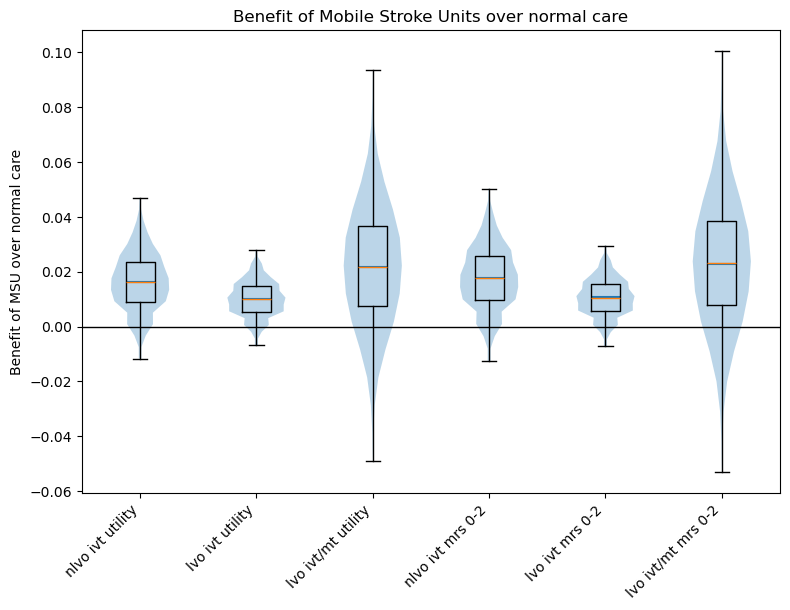

In [7]:
# Define results columns
results_cols = [
    'nlvo_msu_ivt_utility_benefit',
    'lvo_msu_ivt_utility_benefit',
    'lvo_msu_ivt_mt_utility_benefit',
    'nlvo_msu_ivt_mrs_0-2_benefit',
    'lvo_msu_ivt_mrs_0-2_benefit',
    'lvo_msu_ivt_mt_mrs_0-2_benefit'
]

rename_dict = {
        
    'nlvo_msu_ivt_utility_benefit':'nlvo ivt utility',
    'lvo_msu_ivt_utility_benefit': 'lvo ivt utility',
    'lvo_msu_ivt_mt_utility_benefit': 'lvo ivt/mt utility',
    'nlvo_msu_ivt_mrs_0-2_benefit': 'nlvo ivt mrs 0-2',
    'lvo_msu_ivt_mrs_0-2_benefit': 'lvo ivt mrs 0-2',
    'lvo_msu_ivt_mt_mrs_0-2_benefit': 'lvo ivt/mt mrs 0-2',
}

# Plot violin plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.violinplot(results[results_cols], showextrema=False, showmeans=True, points=15)
# Add boxplot
ax.boxplot(results[results_cols], positions=np.arange(1, len(results_cols)+1), widths=0.25, whis=100)
# Add x-axis labels
ax.set_xticks(np.arange(1, len(results_cols)+1))
# Set labels using rename dict
ax.set_xticklabels([rename_dict[col] for col in results_cols])
plt.xticks(rotation=45, ha='right')
# Add a line at y=0
plt.axhline(0, color='black', lw=1)
# Add labels
plt.ylabel('Benefit of MSU over normal care')
plt.tight_layout()
plt.title('Benefit of Mobile Stroke Units over normal care')
plt.savefig('scenario_1_results_benefit.png', dpi=300, bbox_inches='tight')


plt.show()

## How many scenarios give no benefit of MSU over normal care?

In [8]:
df_no_benefit = pd.DataFrame(
    columns=['total_scenarios_with_no_benefit_of_msu_over_normal_care', 'prop_scenarios_with_no_benefit_of_msu_over_normal_care',],
    index=results_cols
)

for rc in results_cols:
    n_scen_no_benefit = (results[rc] <= 0.0).sum()
    prop_scen_no_benefit = n_scen_no_benefit / len(results)
    # Store in the results dataframe:
    df_no_benefit.loc[rc, 'total_scenarios_with_no_benefit_of_msu_over_normal_care'] = n_scen_no_benefit
    df_no_benefit.loc[rc, 'prop_scenarios_with_no_benefit_of_msu_over_normal_care'] = prop_scen_no_benefit

In [9]:
df_no_benefit

,total_scenarios_with_no_benefit_of_msu_over_normal_care,prop_scenarios_with_no_benefit_of_msu_over_normal_care
nlvo_msu_ivt_utility_benefit,6156,0.058642
lvo_msu_ivt_utility_benefit,4536,0.04321
lvo_msu_ivt_mt_utility_benefit,17520,0.166895
nlvo_msu_ivt_mrs_0-2_benefit,5184,0.049383
lvo_msu_ivt_mrs_0-2_benefit,4536,0.04321
lvo_msu_ivt_mt_mrs_0-2_benefit,17520,0.166895


## Which types of scenario give no benefit of MSU over normal care?

Combine the input times into groups: times that affect both usual care and MSU, times that affect usual care only, and times that affect MSU only.

In [10]:
results['time_to_ivt_without_travel_normal_care'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_time_ambulance_response'],
    results['process_ambulance_on_scene_duration'],
    results['process_time_arrival_to_needle'],
], axis=0)
results['time_to_mt_with_transfer_without_travel_normal_care'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_time_ambulance_response'],
    results['process_ambulance_on_scene_duration'],
    results['transfer_time_delay'],
    results['process_time_arrival_to_puncture'],
], axis=0)
results['time_to_mt_without_transfer_without_travel_normal_care'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_time_ambulance_response'],
    results['process_ambulance_on_scene_duration'],
    results['process_time_transfer_arrival_to_puncture'],
], axis=0)

In [11]:
results['time_to_ivt_without_travel_msu'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_msu_dispatch'],
    results['process_msu_thrombolysis'],
], axis=0)
results['time_to_mt_without_travel_msu'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_msu_dispatch'],
    results['process_msu_thrombolysis'],
    results['process_msu_on_scene_post_thrombolysis'],
    results['process_time_msu_arrival_to_puncture'],
], axis=0)

In [12]:
results.T

Scenario,0,1,2,3,4,5,6,7,8,9,...,104966,104967,104968,104969,104970,104971,104972,104973,104974,104975
process_time_call_ambulance,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
process_time_ambulance_response,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
process_ambulance_on_scene_duration,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
process_msu_dispatch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
process_msu_thrombolysis,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
process_msu_on_scene_post_thrombolysis,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
process_time_arrival_to_needle,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
transfer_time_delay,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
process_time_arrival_to_puncture,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,45.000000,...,45.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
process_time_transfer_arrival_to_puncture,30.000000,30.000000,30.000000,45.000000,45.000000,45.000000,60.000000,60.000000,60.000000,30.000000,...,60.000000,30.000000,30.000000,30.000000,45.000000,45.000000,45.000000,60.000000,60.000000,60.000000


In [13]:
time_cols = [
    'time_to_ivt_without_travel_normal_care',
    'time_to_mt_with_transfer_without_travel_normal_care',
    'time_to_mt_without_transfer_without_travel_normal_care',
    'time_to_ivt_without_travel_msu',
    'time_to_mt_without_travel_msu',
]

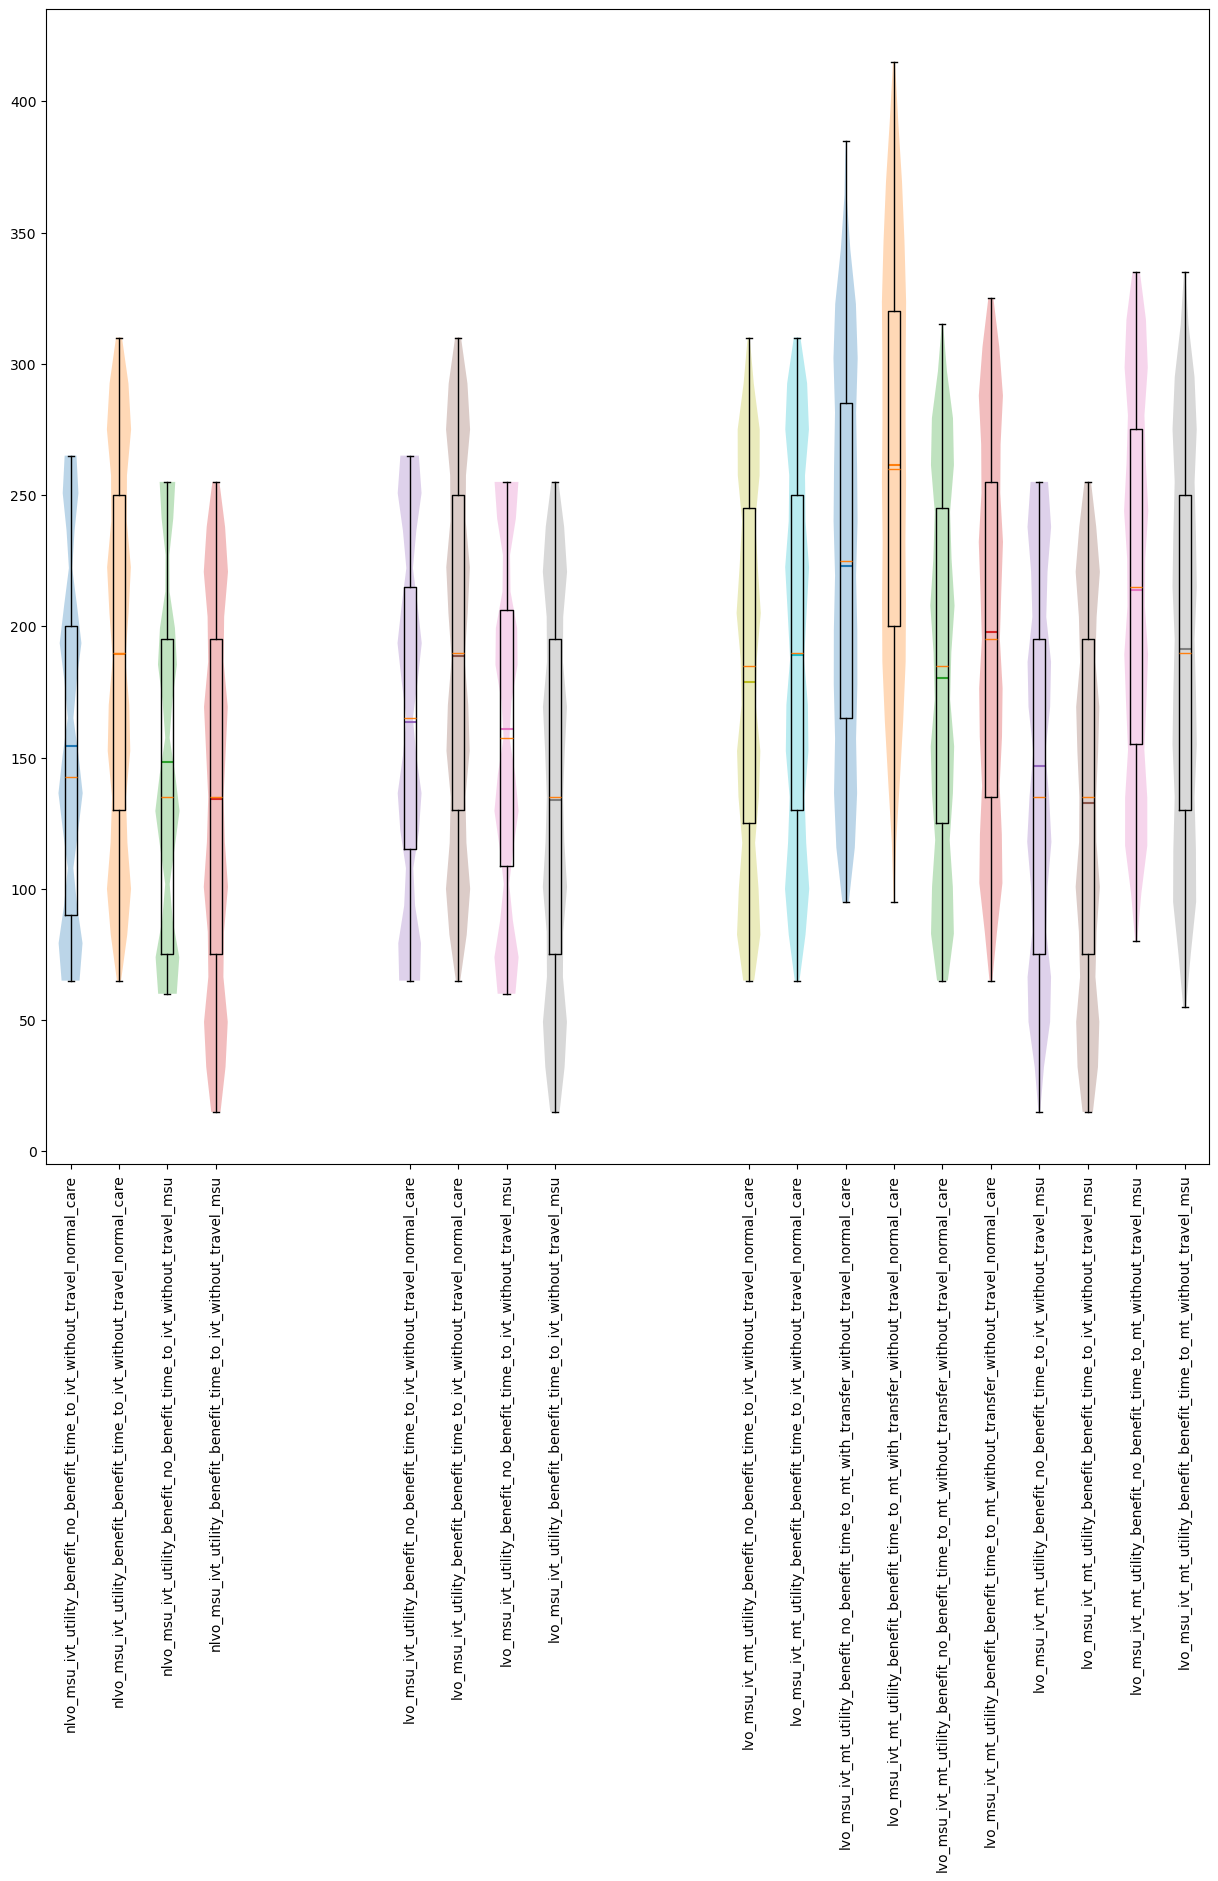

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))

xlabels = []
x = 0
for rc in results_cols[:3]:
    masks = {
        'no_benefit': (results[rc] <= 0.0),
        'benefit': ~(results[rc] <= 0.0),
    }

    time_cols_here = time_cols if 'mt' in rc else [c for c in time_cols if 'mt' not in c]
    
    for time_col in time_cols_here:
        for mask_name, mask in masks.items():
            vals = results.loc[mask, time_col]
            
            ax.violinplot(vals, positions=[x], showextrema=False, showmeans=True, points=15)
            # Add boxplot
            ax.boxplot(vals, positions=[x], widths=0.25, showfliers=False)

            xlabel = f'{rc}_{mask_name}_{time_col}'
            xlabels.append(xlabel)
            x+=1
    x+=3

ax.set_xticklabels(xlabels, rotation=90)
plt.show()

## How do input parameters affect the benefit of MSU over normal care?

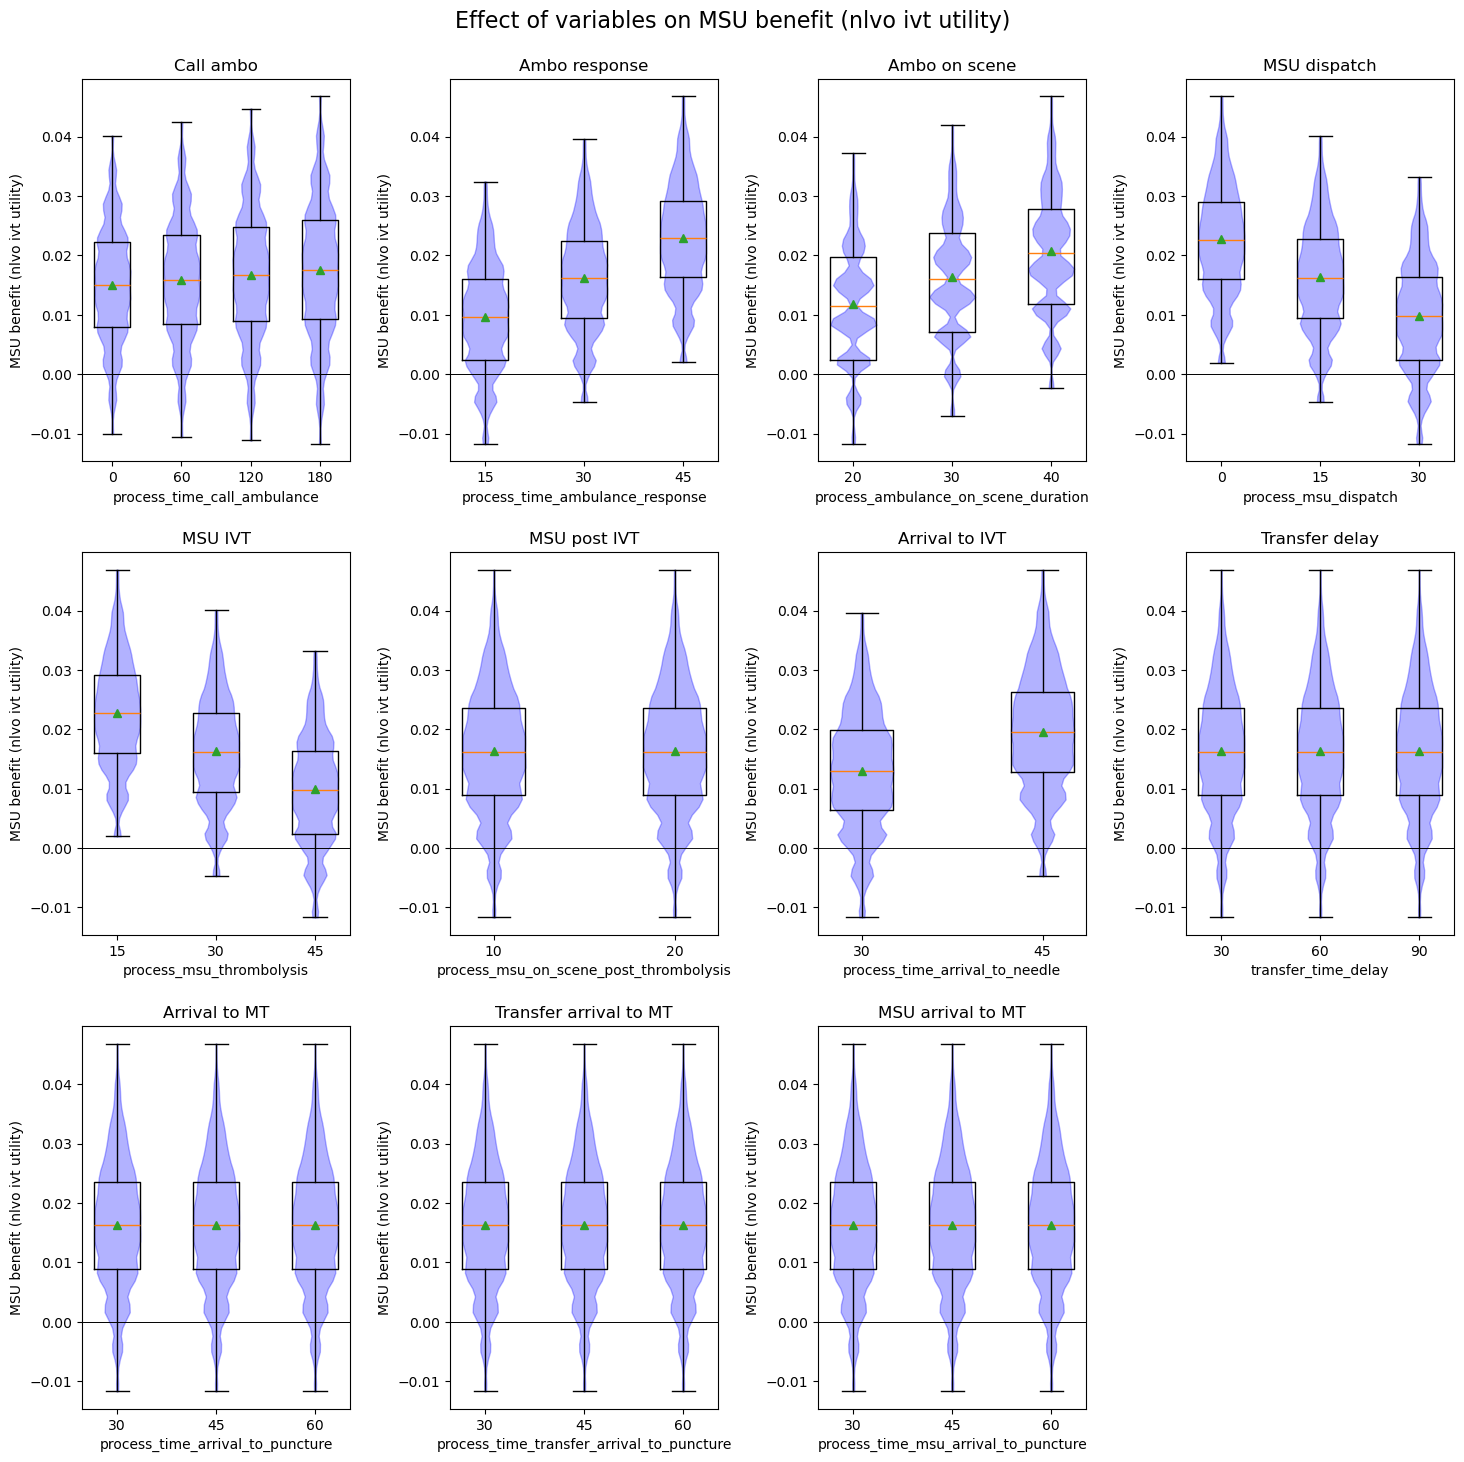

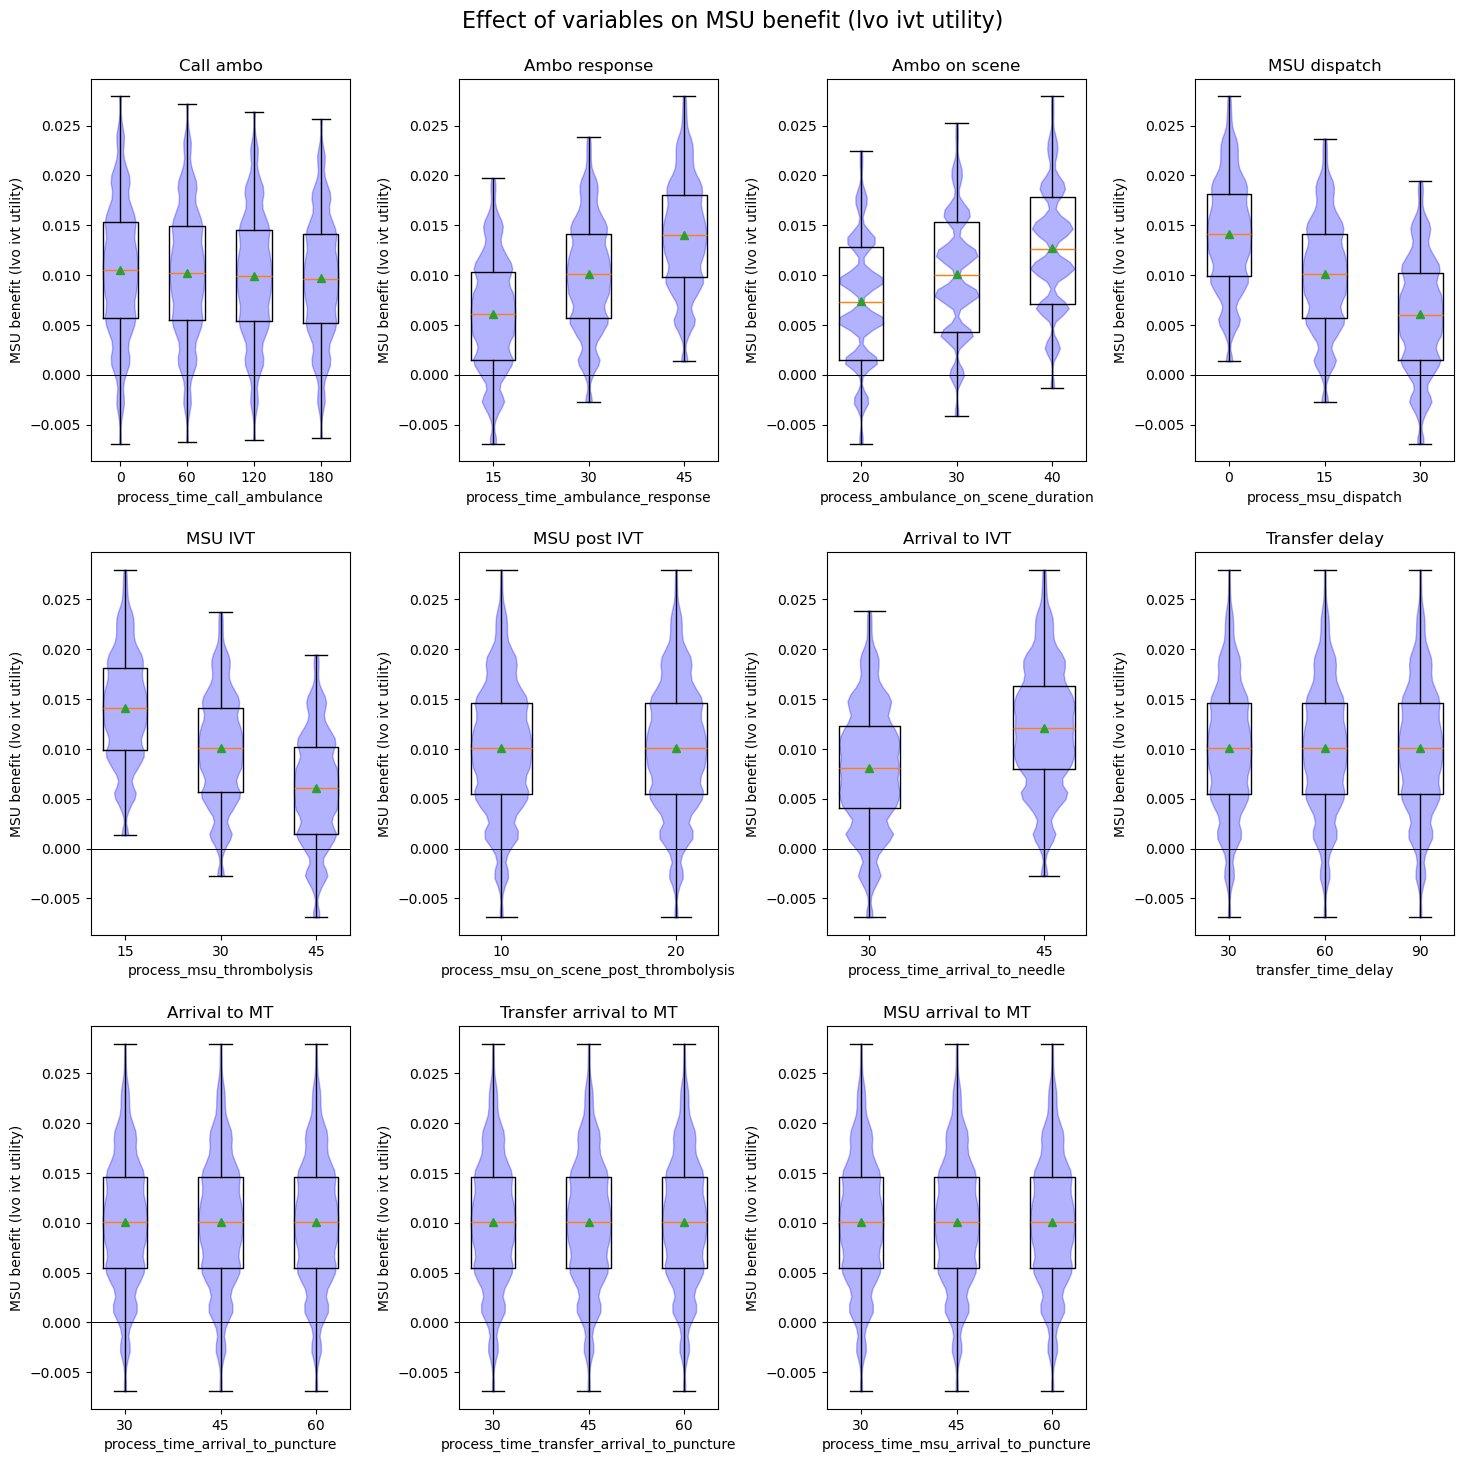

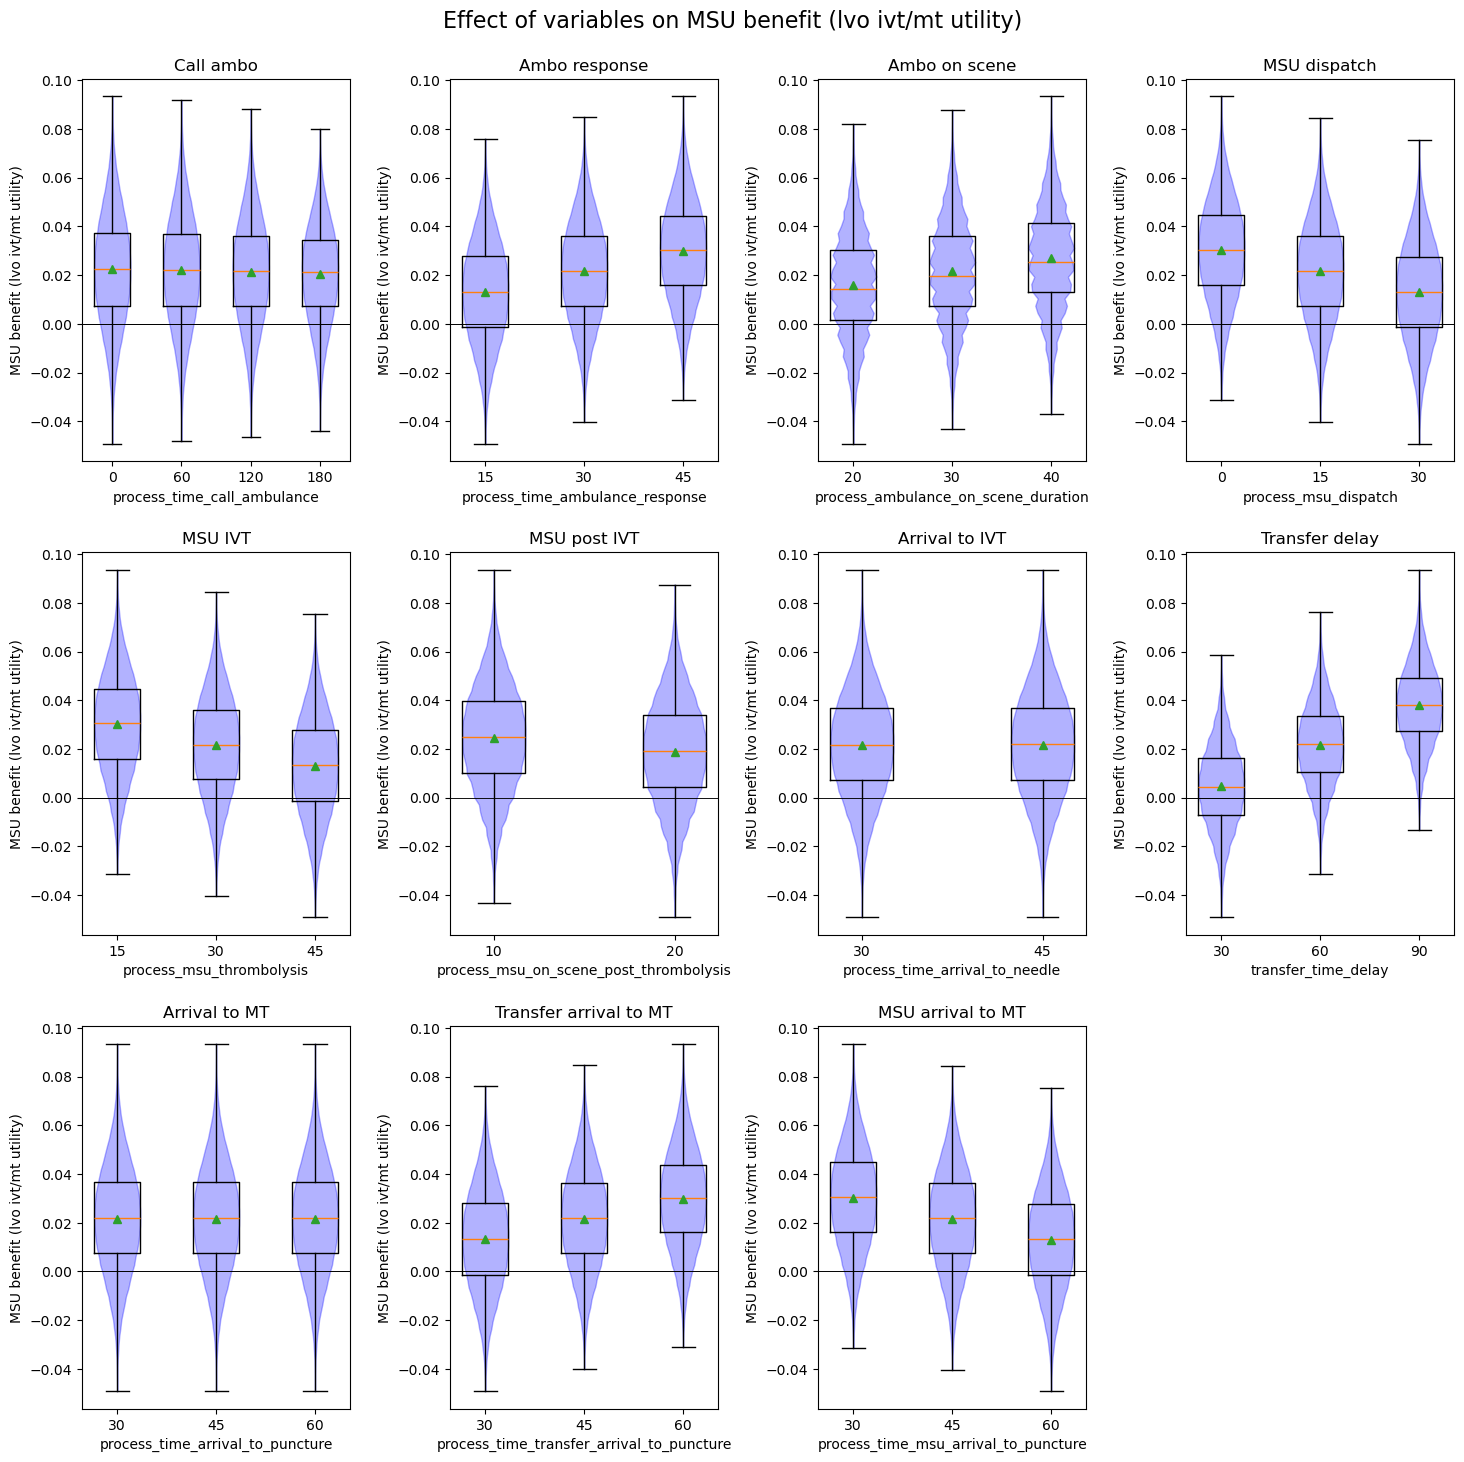

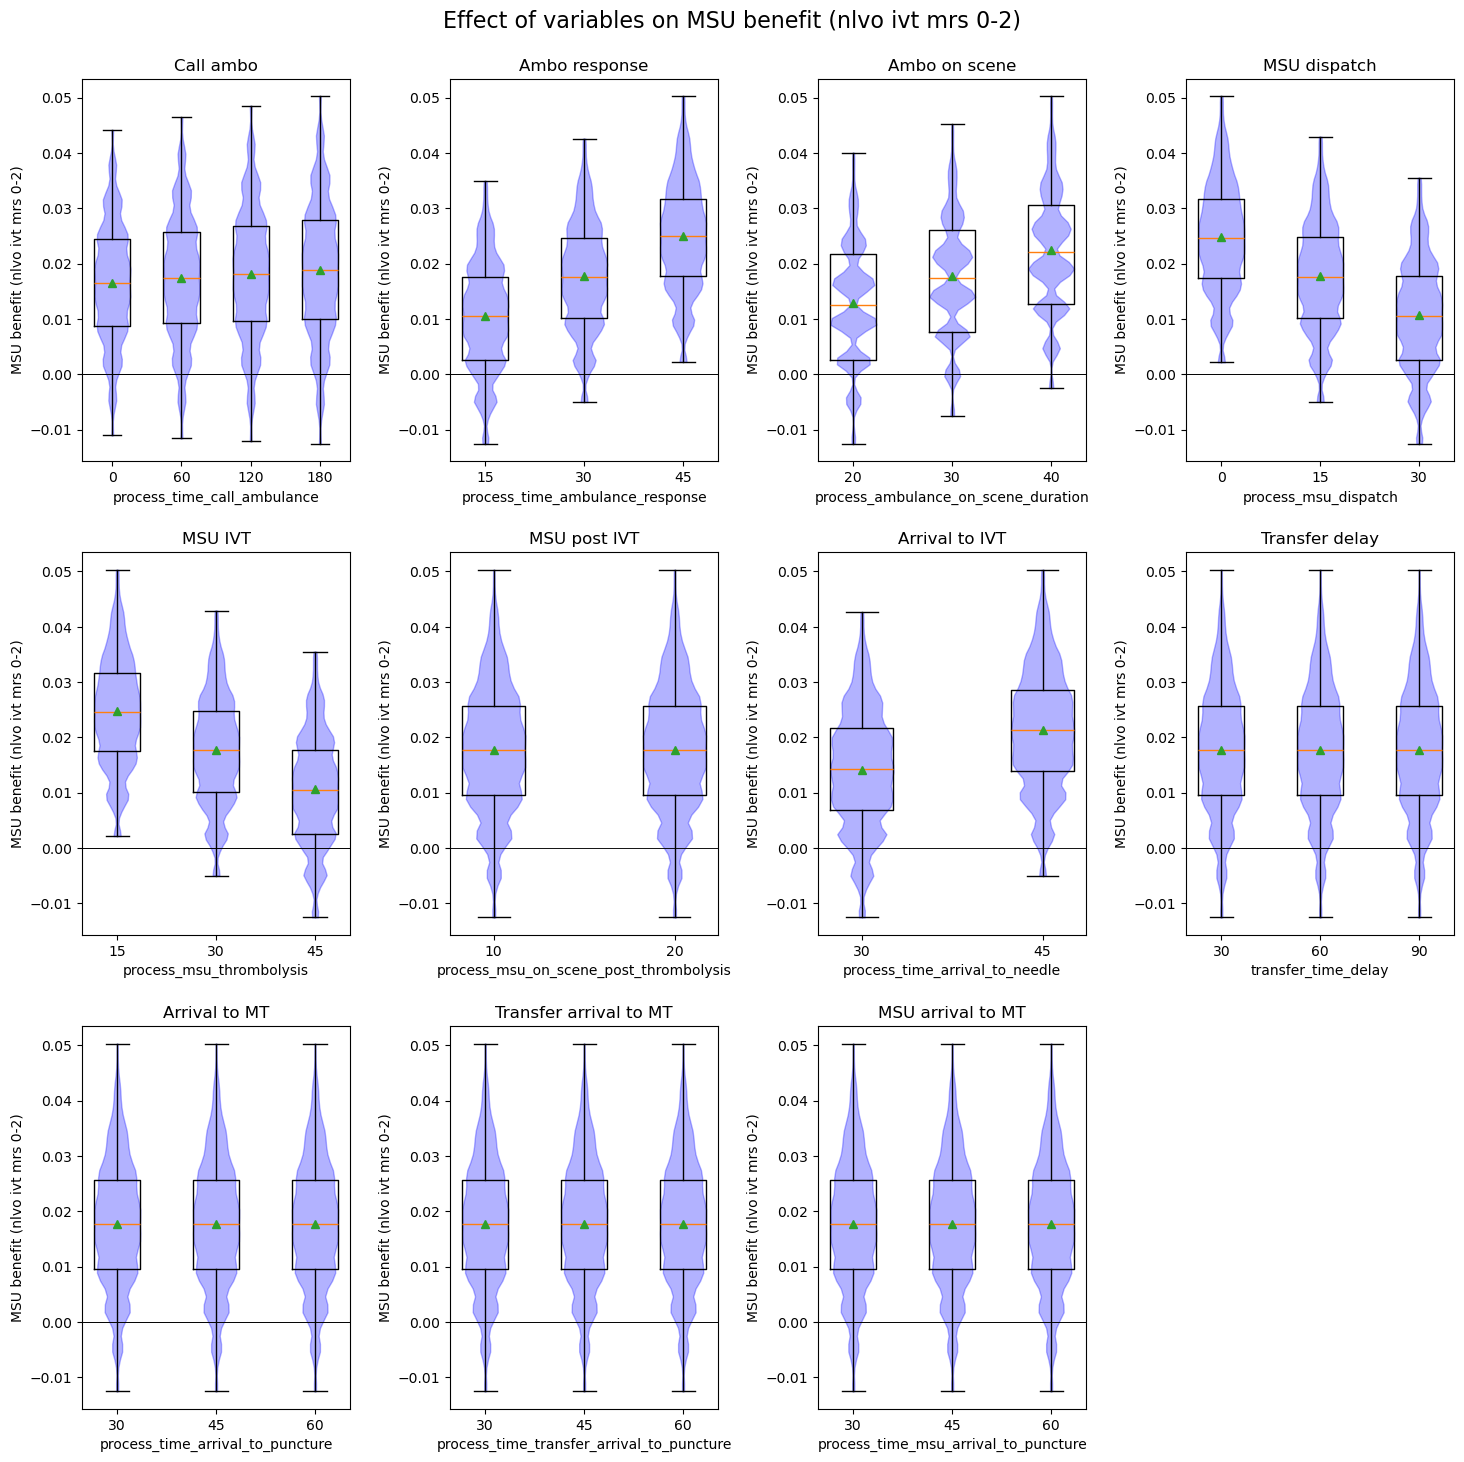

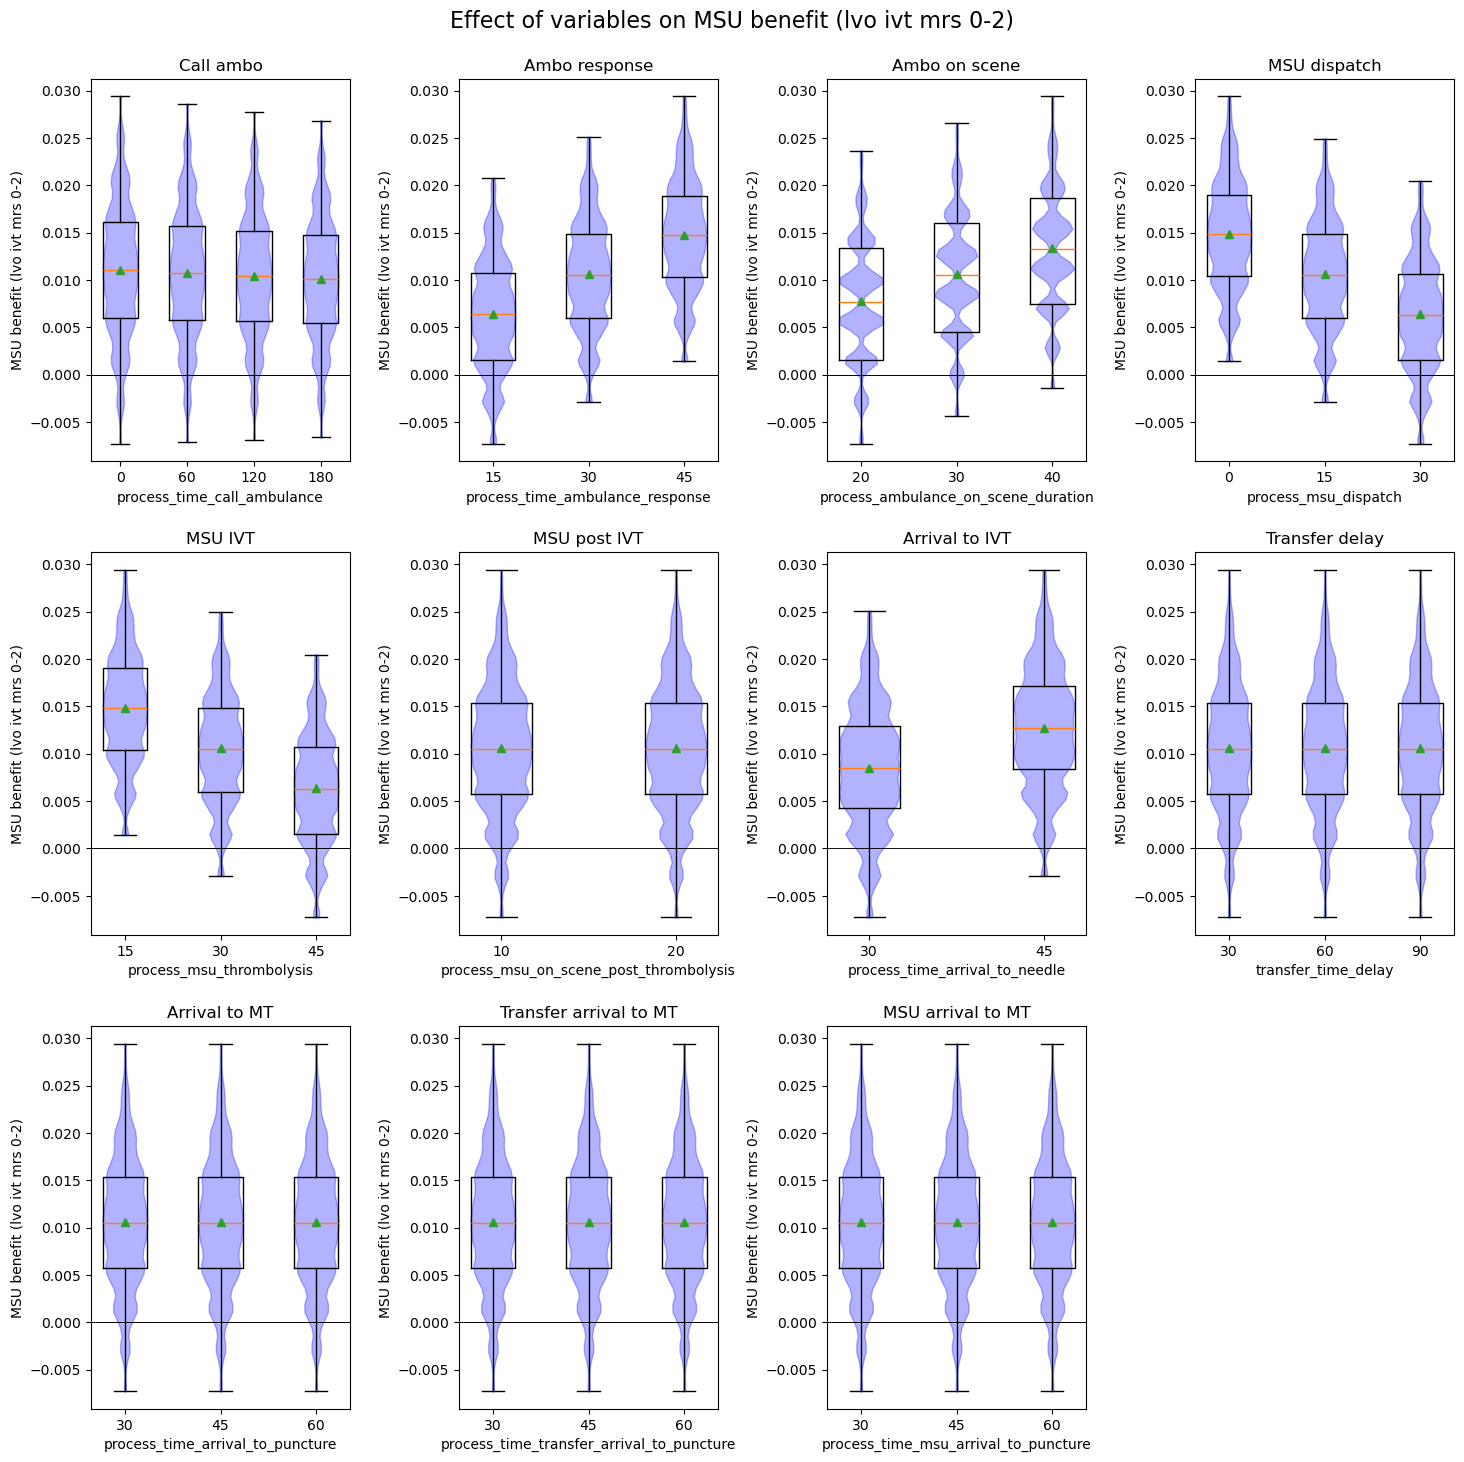

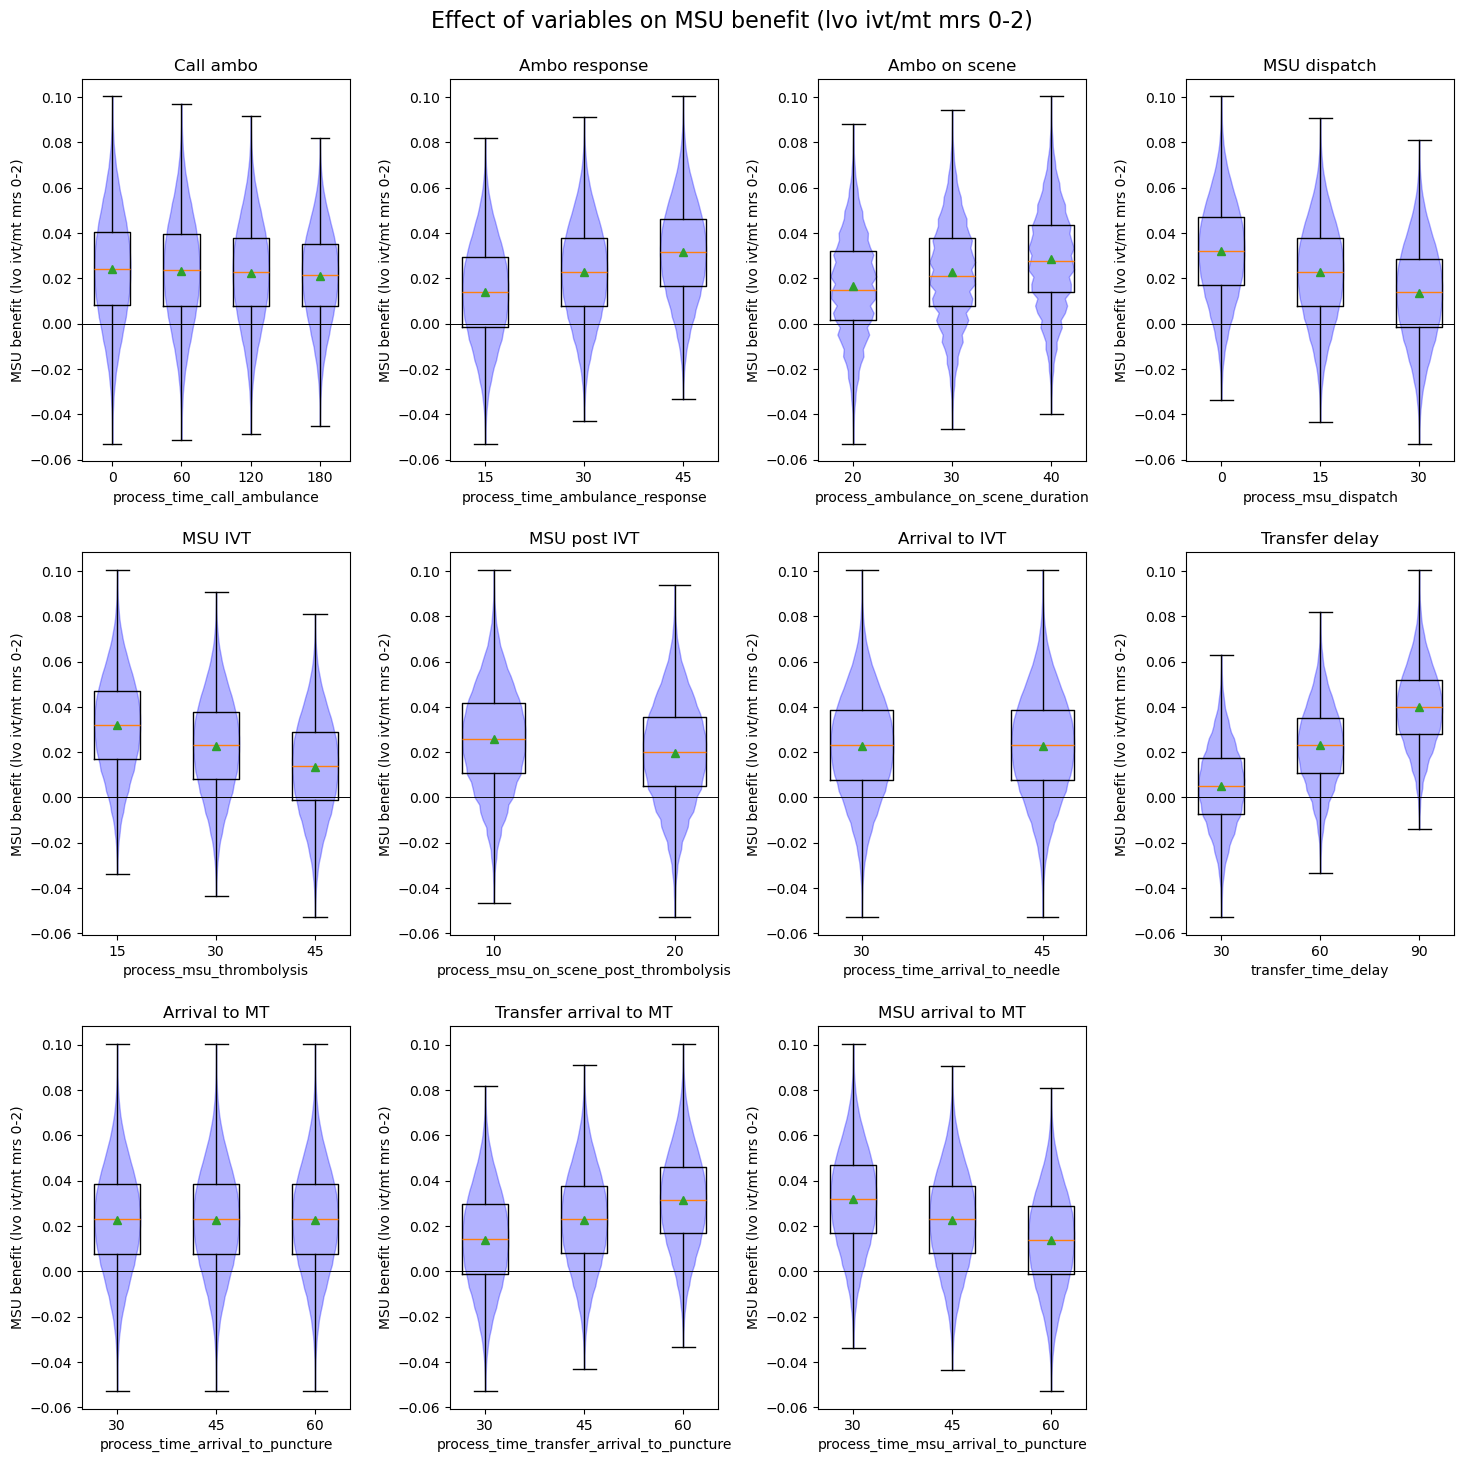

In [15]:
# 

variables = ['process_time_call_ambulance',
 'process_time_ambulance_response',
 'process_ambulance_on_scene_duration',
 'process_msu_dispatch',
 'process_msu_thrombolysis',
 'process_msu_on_scene_post_thrombolysis',
 'process_time_arrival_to_needle',
 'transfer_time_delay',
 'process_time_arrival_to_puncture',
 'process_time_transfer_arrival_to_puncture',
 'process_time_msu_arrival_to_puncture',
]


rename_var_dict = {
'process_time_call_ambulance':'Call ambo',
'process_time_ambulance_response':'Ambo response',
'process_ambulance_on_scene_duration':'Ambo on scene',
'process_msu_dispatch':'MSU dispatch',
'process_msu_thrombolysis':'MSU IVT',
'process_msu_on_scene_post_thrombolysis':'MSU post IVT',
'process_time_arrival_to_needle':'Arrival to IVT',
'transfer_time_delay':'Transfer delay',
'process_time_arrival_to_puncture':'Arrival to MT',
'process_time_transfer_arrival_to_puncture':'Transfer arrival to MT',
'process_time_msu_arrival_to_puncture':'MSU arrival to MT',
}

results_cols = [
    'nlvo_msu_ivt_utility_benefit',
    'lvo_msu_ivt_utility_benefit',
    'lvo_msu_ivt_mt_utility_benefit',
    'nlvo_msu_ivt_mrs_0-2_benefit',
    'lvo_msu_ivt_mrs_0-2_benefit',
    'lvo_msu_ivt_mt_mrs_0-2_benefit'
]

rename_result_dict = {
        
    'nlvo_msu_ivt_utility_benefit':'nlvo ivt utility',
    'lvo_msu_ivt_utility_benefit': 'lvo ivt utility',
    'lvo_msu_ivt_mt_utility_benefit': 'lvo ivt/mt utility',
    'nlvo_msu_ivt_mrs_0-2_benefit': 'nlvo ivt mrs 0-2',
    'lvo_msu_ivt_mrs_0-2_benefit': 'lvo ivt mrs 0-2',
    'lvo_msu_ivt_mt_mrs_0-2_benefit': 'lvo ivt/mt mrs 0-2',
}

# For each result column, draw a violin of the effect of each variable

"""
for result in results_cols[0:2]:
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.violinplot(results[variables], showextrema=False, showmeans=True, points=30)
    # Add boxplot
    #ax.boxplot(results[variables], positions=np.arange(1, len(variables)+1), widths=0.25, showfliers=False)
    # Add x-axis labels
    ax.set_xticks(np.arange(1, len(variables)+1))
    # Set labels using rename dict
    ax.set_xticklabels([rename_dict[col] for col in variables])
    plt.xticks(rotation=45, ha='right')
    # Add a line at y=0
    plt.axhline(0, color='black', lw=1)
    # Add labels
    plt.ylabel('Benefit of MSU over normal care')
    plt.tight_layout()
    plt.title(f'Benefit of Mobile Stroke Units over normal care {result}')
    #plt.savefig('xxx.png', dpi=300, bbox_inches='tight')
"""


for i,result in enumerate(results_cols):
    fig = plt.figure(figsize=(15, 15))
    y = results[result]
    for i, var in enumerate(variables):
        ax = fig.add_subplot(3,4,i+1)
        x = results[var]
        # Get unique values of X and plot a violin plot of y for each value
        unique_x = np.unique(x)
        for u in unique_x:
            y_for_x = y[x == u]
            # calculate widths to fit x axis
            widths = 0.7 * (max(unique_x) - min(unique_x)) / len(unique_x)
            #ax.violinplot(y_for_x, positions=[u], showextrema=False, showmeans=True, widths=widths, points=45)
            # Color
            parts = ax.violinplot(y_for_x, positions=[u], showextrema=False, showmeans=False, widths=widths, points=45)
            for pc in parts['bodies']:
                pc.set_facecolor('blue')
                pc.set_edgecolor('blue')
            ax.boxplot(y_for_x, positions=[u], showmeans=True, widths=widths, whis=100)
            # Add line at y=0
            ax.axhline(0, color='black', lw=0.5)
        ax.set_title(rename_var_dict[var])
        ax.set_xlabel(var)
        ax.set_ylabel(f'MSU benefit ({rename_result_dict[result]})')
    fig.suptitle(f'Effect of variables on MSU benefit ({rename_result_dict[result]})', fontsize=16)
    fig.tight_layout(pad=2)
    plt.show()

## Net benefit

0.14615	0.25552	0.59833 (haem: LVO: nLVO, based on SSNAP)
30% LVO and 70% nLVO

In [16]:
prop_nlvo = 0.7
prop_lvo = 1 - prop_nlvo

data['drip_ship_utility_shift'] = (
    (data['nlvo_drip_ship_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_drip_ship_ivt_mt_utility_shift'] * prop_lvo))

data['mothership_utility_shift'] = (
    (data['nlvo_mothership_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_utility_shift'] * prop_lvo))

data['msu_utility_shift'] = (
    (data['nlvo_msu_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_utility_shift'] * prop_lvo))

data['msu_benefit'] = data['msu_utility_shift'] - data['drip_ship_utility_shift']

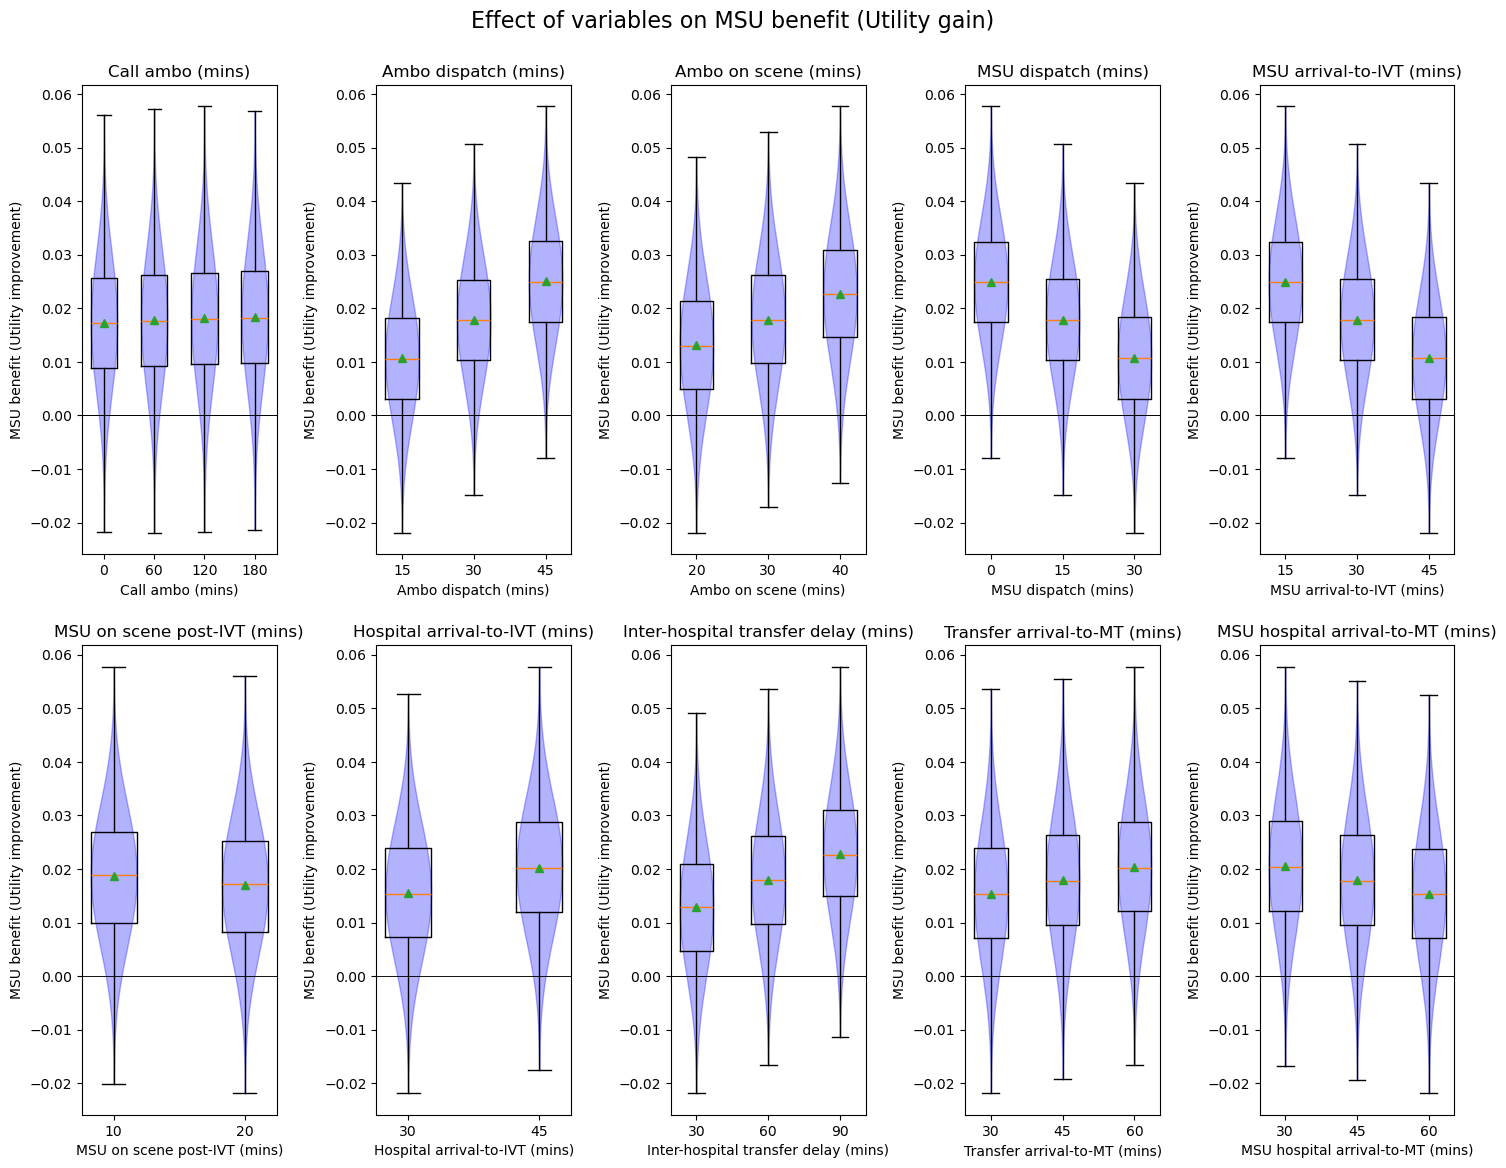

In [20]:
variables = ['process_time_call_ambulance',
 'process_time_ambulance_response',
 'process_ambulance_on_scene_duration',
 'process_msu_dispatch',
 'process_msu_thrombolysis',
 'process_msu_on_scene_post_thrombolysis',
 'process_time_arrival_to_needle',
 'transfer_time_delay',
 'process_time_transfer_arrival_to_puncture',
 'process_time_msu_arrival_to_puncture',
]


rename_var_dict = {
'process_time_call_ambulance':'Call ambo (mins)',
'process_time_ambulance_response':'Ambo dispatch (mins)',
'process_ambulance_on_scene_duration':'Ambo on scene (mins)',
'process_msu_dispatch':'MSU dispatch (mins)',
'process_msu_thrombolysis':'MSU arrival-to-IVT (mins)',
'process_msu_on_scene_post_thrombolysis':'MSU on scene post-IVT (mins)',
'process_time_arrival_to_needle':'Hospital arrival-to-IVT (mins)',
'transfer_time_delay':'Inter-hospital transfer delay (mins)',
'process_time_arrival_to_puncture':'Hospital arrival-to-MT for\nIVT/MT admissions (mins)',
'process_time_transfer_arrival_to_puncture':'Transfer arrival-to-MT (mins)',
'process_time_msu_arrival_to_puncture':'MSU hospital arrival-to-MT (mins)',
}

results_cols = [
    'msu_net_benefit'
]

rename_result_dict = {
        
    'nlvo_msu_ivt_utility_benefit':'nlvo ivt utility',
    'lvo_msu_ivt_utility_benefit': 'lvo ivt utility',
    'lvo_msu_ivt_mt_utility_benefit': 'lvo ivt/mt utility',
    'nlvo_msu_ivt_mrs_0-2_benefit': 'nlvo ivt mrs 0-2',
    'lvo_msu_ivt_mrs_0-2_benefit': 'lvo ivt mrs 0-2',
    'lvo_msu_ivt_mt_mrs_0-2_benefit': 'lvo ivt/mt mrs 0-2',
    'msu_net_benefit': 'MSU net benefit (utility)',
}

# For each result column, draw a violin of the effect of each variable




for i,result in enumerate(results_cols):
    fig = plt.figure(figsize=(15, 12))
    y = results[result]
    for i, var in enumerate(variables):
        ax = fig.add_subplot(2,5,i+1)
        x = results[var]
        # Get unique values of X and plot a violin plot of y for each value
        unique_x = np.unique(x)
        for u in unique_x:
            y_for_x = y[x == u]
            # calculate widths to fit x axis
            widths = 0.7 * (max(unique_x) - min(unique_x)) / len(unique_x)
            #ax.violinplot(y_for_x, positions=[u], showextrema=False, showmeans=True, widths=widths, points=45)
            # Color
            parts = ax.violinplot(y_for_x, positions=[u], showextrema=False, showmeans=False, widths=widths, points=45)
            for pc in parts['bodies']:
                pc.set_facecolor('blue')
                pc.set_edgecolor('blue')
            ax.boxplot(y_for_x, positions=[u], showmeans=True, widths=widths, whis=100)
            # Add line at y=0
            ax.axhline(0, color='black', lw=0.5)
        ax.set_title(rename_var_dict[var])
        ax.set_xlabel(rename_var_dict[var])
        ax.set_ylabel(f'MSU benefit (Utility improvement)')
    fig.suptitle(f'Effect of variables on MSU benefit (Utility gain)', fontsize=16)
    fig.tight_layout(pad=2)
    plt.show()

In [18]:
results.shape

(104976, 26)

In [19]:
mask = results['msu_net_benefit'] < 0
mask.mean()

0.07378829446730681